**Predict The Stock Market With Machine Learning**

youtube video 
https://www.youtube.com/watch?v=1O_BenficgE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

# Download S&P 500 Price Data

## import package `yfinance` which calls the yahoo finance API to download daily stock and index prices


In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

## Initialize a *Ticker class* which will enable to download price history for a single symbol.
ex: TSLA is the symbol to Tesla, AMZN is for Amazon...\
S&P 500 symbol is **^GSPC**

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500.ticker

'^GSPC'

In [6]:
sp500.__dict__

{'ticker': '^GSPC',
 'session': None,
 '_history': None,
 '_base_url': 'https://query2.finance.yahoo.com',
 '_scrape_url': 'https://finance.yahoo.com/quote',
 '_fundamentals': False,
 '_info': None,
 '_analysis': None,
 '_sustainability': None,
 '_recommendations': None,
 '_major_holders': None,
 '_institutional_holders': None,
 '_mutualfund_holders': None,
 '_isin': None,
 '_news': [],
 '_shares': None,
 '_calendar': None,
 '_expirations': {},
 '_earnings_dates': None,
 '_earnings_history': None,
 '_earnings': {'yearly': Empty DataFrame
  Columns: [Open, High, Low, Close, Adj Close, Volume]
  Index: [],
  'quarterly': Empty DataFrame
  Columns: [Open, High, Low, Close, Adj Close, Volume]
  Index: []},
 '_financials': {'yearly': Empty DataFrame
  Columns: [Open, High, Low, Close, Adj Close, Volume]
  Index: [],
  'quarterly': Empty DataFrame
  Columns: [Open, High, Low, Close, Adj Close, Volume]
  Index: []},
 '_balancesheet': {'yearly': Empty DataFrame
  Columns: [Open, High, Low, Clo

In [7]:
sp500_df = sp500.history(period="max")

In [8]:
sp500_df.shape

(18248, 7)

In [9]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18248 entries, 1950-01-03 to 2022-07-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18248 non-null  float64
 1   High          18248 non-null  float64
 2   Low           18248 non-null  float64
 3   Close         18248 non-null  float64
 4   Volume        18248 non-null  int64  
 5   Dividends     18248 non-null  int64  
 6   Stock Splits  18248 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [10]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000,0,0
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000,0,0
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,0,0


In [11]:
sp500_df.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11'],
              dtype='datetime64[ns]', name='Date', length=18248, freq=None)

# Cleaning and vizualizing our stock market data

## Plot closing price VS Time

<AxesSubplot:xlabel='Date'>

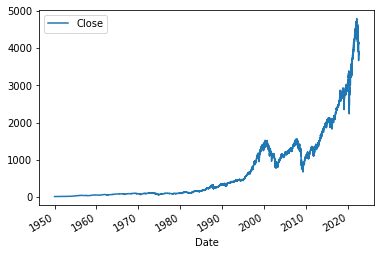

In [12]:
sp500_df.plot(y="Close", use_index=True)

## Do some cleaning, remove extra not needed columns 

In [13]:
sp500_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [14]:
sp500_df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

In [15]:
sp500_df

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000


# Setting up a target for Machine Learning

## Defining the target

What do we want to predict? 
- tomorrow's price - > a bit too accurate, the model will not be able to catch very well absolute values
- **up or down**: ultimately this is what we are after. We do not care much the exact value, we just want to know if we need to buy or sell. The **directionality** is important

Target will be: will the stock go up or down? \
Create a column called `Tomorrow` and will give tomorrow's price

In [16]:
sp500_df["Tomorrow"] = sp500_df.Close.shift(-1)

In [17]:
sp500_df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000,3845.080078
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000,3902.620117
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883


In [18]:
sp500_df["Target"] = (sp500_df.Close < sp500_df.Tomorrow).astype(int)

In [19]:
sp500_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000,3845.080078,1
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000,3902.620117,1
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883,0


## Remove some historical data

In stock market some historical data are not that relevant because the market may have changed drastically. \
Remove all data before 1990

In [20]:
sp500_df[sp500_df.index>=datetime.datetime(1990,1,1)]

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000,3845.080078,1
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000,3902.620117,1
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883,0


Or another way to select with loc[]. \
Do not forget the .copy() to avoid messages from python

In [21]:
sp500_df = sp500_df.loc["1990-01-01":].copy()

# Training initial model: random forest

Random Forest is a good initial model. \
It works by:
- training a bunch of individual decision trees with **randomized parameters**
- averaging the result

random forest benefits are:
- resistant to overfitting
- run quickly
- pick up non linear tendencies. 

In this case there is no linearity between the input and target (0 or 1)

In [22]:
from sklearn.ensemble import RandomForestClassifier

## Initialize a model

`n_estimators`: how many decision trees we want to initialize. The more the more accurate, but the longer. 100 is pretty low. \
`min_samples_split`: prevents overfitting (decision tress tend to overfit if they are built too deeply). the higher, the less accurate the model, but the less it will overfit. \
`random_state`: just to have the same initialization when you are trying to improving a model


In [23]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

## Split the input data for train and test
This is **time series data**: do not use cross validation. if we used cross val, we will be using future data to predict the past... this results in leakage!\
Choose all data except for the last 100 for the train set and the last 100 values for the test set

In [24]:
train = sp500_df.iloc[:-100]
test = sp500_df.iloc[-100:]


**Set predictors**
create a list of all possible predictors to be sure you remove the target from it!

In [25]:
list(sp500_df.columns)

['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target']

In [26]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

## Train the model

In [81]:
model.fit(train[predictors], train.Target)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [82]:
model.__dict__

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Close', 'Volume', 'Open', 'High', 'Low'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'base_estimator_': DecisionTreeClassifier(),
 'estimators_': [DecisionTreeClassifier(max_features='auto', min_samples_split=100,
                   

In [83]:
train[predictors].head()

,Close,Volume,Open,High,Low
Date,,,,,
1990-01-02,359.690002,162070000,353.399994,359.690002,351.980011
1990-01-03,358.760010,192330000,359.690002,360.589996,357.890015
1990-01-04,355.670013,177000000,358.760010,358.760010,352.890015
1990-01-05,352.200012,158530000,355.670013,355.670013,351.350006
1990-01-08,353.790009,140110000,352.200012,354.239990,350.540009


In [84]:
train.iloc[0:2,:5].to_numpy().shape

(2, 5)

## measure the accuracy of the baseline
Measure the precision. Precision is: how many predicted positive were actual positive?\
Precision = TP / (TP + FP)\
Precision tends to minimize FP

In [102]:
from sklearn.metrics import precision_score

In [127]:
y_true = test.Target
y_pred = pd.Series(model.predict(test[predictors]),index=test.index)
y_true.shape, y_pred.shape

((100,), (100,))

In [151]:
round(precision_score(y_true, y_pred),2)

0.44

That is not a great score!\
Why is precision not so great? plot pred VS actual

In [133]:
combined = pd.concat([y_true, y_pred], axis= 1)

In [134]:
combined.columns = ["Target","pred"]

<AxesSubplot:xlabel='Date'>

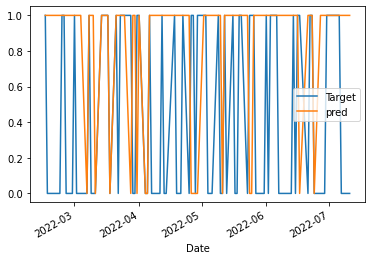

In [152]:
combined.plot()

In [150]:
combined.value_counts()

Target  pred
0       1       47
1       1       37
0       0        8
1       0        8
dtype: int64

The prediction got:

47 + 37 = **84 P**\
8 + 8 = **16 N**

The actual was: 

37 + 8 = **45 P**\
47 + 8 = **55 N**

Precision = TP/(TP + FP) = 37/(37+47)=0.44\
Poor Prediction, way to many False Positive


# Backtesting

Next test: build a more robust way to test. Currently we can only test on the last 100 occurrences. do backtesting to test accross multiples years. \
First thing: build a function to wrap up everything we just did

## instantiate a function that does everything we have done above

In [180]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train.Target)
    y_pred = pd.Series(model.predict(test[predictors]),index=test.index, name = "Predictions")
    combined = pd.concat([test.Target, y_pred], axis= 1)
    return combined#, "precision is " +str(round(precision_score(test.Target,model.predict(test[predictors])),2))
    

In [181]:
predict(train, test, predictors, model)

,Target,Predictions
Date,,
2022-02-15,1,1
2022-02-16,0,1
2022-02-17,0,1
2022-02-18,0,1
2022-02-22,0,1
...,...,...
2022-07-05,1,1
2022-07-06,1,1
2022-07-07,0,1


## instantiate a function that will do predicitons for all years

**start value**: train your first model with 2500 data ie about 10 years (each year is about 250 days)\
**step**: train a model for about a year (250 data)

We will start training a first model for 10 years (2500 data), and predict values for the 11th years (250 data).\
2nd model: take following 11 years of data and predict the 12th year.\
3rd model: take following 12 years of data, and predict the 13th year...

In [185]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions=[] # list of df where each df is the prediciton for a single year
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        prediction = predict(train, test, predictors, model)
        all_predictions.append(prediction)
    return pd.concat(all_predictions)

In [186]:
predictions = backtest(sp500_df, model, predictors)

In [188]:
predictions

,Target,Predictions
Date,,
1999-11-22,0,0
1999-11-23,1,0
1999-11-24,0,0
1999-11-26,0,0
1999-11-29,0,0
...,...,...
2022-07-05,1,1
2022-07-06,1,1
2022-07-07,0,0


In [190]:
predictions.Predictions.value_counts()

0    3329
1    2365
Name: Predictions, dtype: int64

In [191]:
precision_score(predictions.Target, predictions.Predictions)

0.5353065539112051

When we predicted that the stock would go up, it actually did in 53% of the times.\
Compare it to a **baseline model**: say it goes up every day.\
The score for a baseline model where we say it goes up every day would be: 0.5365, actually a bit better than 

In [195]:
predictions.Target.value_counts(normalize=False)

1    3055
0    2639
Name: Target, dtype: int64

Precision score for such a baseline model would be:\
TP/(TP+FP) = 3055/(3055+2639) = 0.5356

In [196]:
predictions.Target.value_counts(normalize=True)

1    0.53653
0    0.46347
Name: Target, dtype: float64

# Adding additional predictors to our model

Create a variety of rolling averages. Compute the mean price in these horizons: over 2 days, 50 days...

In [212]:
sp500_df.rolling(2).mean() # define the rolling window size and apply all sort off operation: mean, sum...

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,356.544998,360.139999,354.935013,359.225006,1.772000e+08,357.215012,0.0
1990-01-04,359.225006,359.675003,355.390015,357.215012,1.846650e+08,353.935013,0.0
1990-01-05,357.215012,357.215012,352.120010,353.935013,1.677650e+08,352.995010,0.5
1990-01-08,353.935013,354.955002,350.945007,352.995010,1.493200e+08,351.705002,0.5
...,...,...,...,...,...,...,...
2022-07-05,3786.805054,3831.005005,3747.080078,3828.359985,3.848070e+09,3838.234985,1.0
2022-07-06,3812.295044,3851.549927,3775.715088,3838.234985,4.020510e+09,3873.850098,1.0
2022-07-07,3845.415039,3890.769897,3834.110107,3873.850098,3.475415e+09,3901.000000,0.5


In [265]:
horizons =[2,50,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_avg = sp500_df.rolling(horizon).mean()    
    ratio_column = f"Close_ratio_{horizon}"
    sp500_df[ratio_column] = sp500_df.Close / rolling_avg.Close
    
    trend_column = f"trend_{horizon}"
    sp500_df[trend_column] = sp500_df.shift(1).rolling(horizon).sum().Target
    #the .shift(1) allows to discard todays target in the predictor, which will avoid leakage
    
    new_predictors+=[ratio_column, trend_column]

In [233]:
sp500_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Close_ratio_50,Close_ratio_60,Close_ratio_250,Close_ratio_1000,trend_2,trend_50,trend_60,trend_250,trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,4427900000,3845.080078,1,1.000791,0.959149,0.941862,0.871476,1.098193,2.0,24.0,27.0,127.0,548.0
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3613120000,3902.620117,1,1.001783,0.964637,0.947771,0.874968,1.101786,2.0,25.0,27.0,128.0,549.0
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883,0,1.007427,0.981009,0.964274,0.888440,1.117924,2.0,25.0,28.0,128.0,549.0


In [266]:
new_predictors

['Close_ratio_2',
 'trend_2',
 'Close_ratio_50',
 'trend_50',
 'Close_ratio_60',
 'trend_60',
 'Close_ratio_250',
 'trend_250',
 'Close_ratio_1000',
 'trend_1000']

Drop all rows with na()

In [269]:
sp500_df.dropna(inplace=True)

# Improving our model

slightly update the model:
- increase number of trees
- reduce number of spilts


In [280]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=100, random_state=1)

Rewrite predict method: use `predict_proba`instead of just `predict`, to tweak the treshold value (default = 0.5)\
Only get the second column, ie the proba of being a 1\
Reduce the treshold so to reduce total number of positives, and so that we are more sure that a positive is actually a positive

In [281]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train.Target)
    y_pred = model.predict_proba(test[predictors])[:,1]
    # set a different treshold to 0.6 instead of 0.5 default
    y_pred = (y_pred>=0.6).astype(int)
    y_pred = pd.Series(y_pred, index = test.index, name = "Predictions")
    combined = pd.concat([test.Target, y_pred], axis= 1)
    return combined

In [282]:
predictions = backtest(sp500_df, model,new_predictors)

In [283]:
predictions

,Target,Predictions
Date,,
2003-11-14,0,0
2003-11-17,0,1
2003-11-18,1,1
2003-11-19,0,1
2003-11-20,1,1
...,...,...
2022-07-01,1,1
2022-07-05,1,0
2022-07-06,1,0


In [284]:
precision_score(predictions.Target, predictions.Predictions)

0.5838587641866331

Supposedly a bit better than our baseline, but not recommended to use it to buy stock!

# Next step

What could we do to improve the model? \
SP500 indeces are only open at US business hours\
- Try to look at other indexes around the world to see if they can be correlated
- Add news about inflation, interest rate... 
- Add key stocks and secotrs: example Tech. If Tech goes downs, chances are that other stocks will go down
- Increase resolution (granularity)

# do a  gridsearch? Best number of trees,...